In [1]:
import pandas as pd

exact_matches = pd.read_parquet("../results/artists_exact_match_large.parquet", engine='pyarrow')
assert "artists" in exact_matches.columns, f'artists is not in {exact_matches.columns}'
assert "num_artists" in exact_matches.columns, f'num_artists is not in {exact_matches.columns}'


import my_utils

artist_mentions = pd.read_parquet('../results/artist_mentions.parquet', engine='pyarrow')

In [2]:
len(exact_matches["prompt"].unique())

1819808

# Artist Mentions

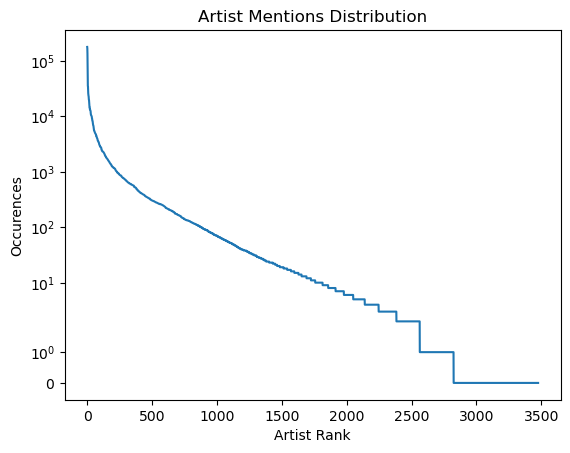

2825 of 3477 artists were mentioned in the prompt dataset


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


occs = pd.read_parquet('../results/artist_mentions.parquet', engine='pyarrow')
scale = "symlog" # "linear", "log", "symlog"

x_data = range(occs.shape[0])
y_data = [x[1]["mentions"] for x in occs.iterrows()]
y_data.sort(reverse=True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_data, y_data)
ax.set_xlabel('Artist Rank')
ax.set_ylabel('Occurences')
plt.yscale(scale)
ax.set_title('Artist Mentions Distribution')

plt.savefig(f'../images/artist_mentions_distribution_scale_{scale}.png')
plt.show()

print(f'{occs[occs["mentions"] > 0 ].shape[0]} of {occs.shape[0]} artists were mentioned in the prompt dataset')


In [4]:
import my_utils


pd.options.display.max_colwidth = 1000

name = "Greg Rutkowski"
artist_df = my_utils.exact_match_dataframe(exact_matches, name)

print(f'{name} exact match found {artist_df.shape[0]} times')


print(f'The artist {name} shows up in {artist_df.shape[0]/len(exact_matches["prompt"].unique()) * 100}% of all prompts.')
print(f'some prompts that mention {name}:')
print(artist_df.head(5)[["prompt", "artists", "styles"]])

Greg Rutkowski exact match found 180080 times
The artist Greg Rutkowski shows up in 9.895549420598217% of all prompts.
some prompts that mention Greg Rutkowski:
                                                                                                                                                                                                                                                                                                                                                                                                  prompt  \
136                                                                                                                 rimworld concept art isometric perspective, epic, by victo ngai, kilian eng vibrant colours, dynamic lighting, digital art, winning award masterpiece, fantastically beautiful, illustration, inspired by beksinski and dan mumford, trending on artstation, by greg rutkowski, 8 k    
216  realistic streetview, retro futuristic sub

## Top Artist exact matching

total mentions 1955659
top 10 artists
                      artist  mentions  style_mentions   percent
1995          Greg Rutkowski    180080           38156  9.208149
3287  Trending on artstation    170077           59912  8.696659
99                   Artgerm    136547           26422  6.982148
1644          Alphonse Mucha     81170           14678  4.150519
3259                    WLOP     63075           19288  3.225256
1319          Ilya Kuvshinov     35400            5096  1.810132
2100          Makoto Shinkai     34900            5815  1.784565
1600          Hayao Miyazaki     29244            5138  1.495353
1152              James Jean     26144           10512  1.336838
873              Jean Giraud     24118            8455  1.233242


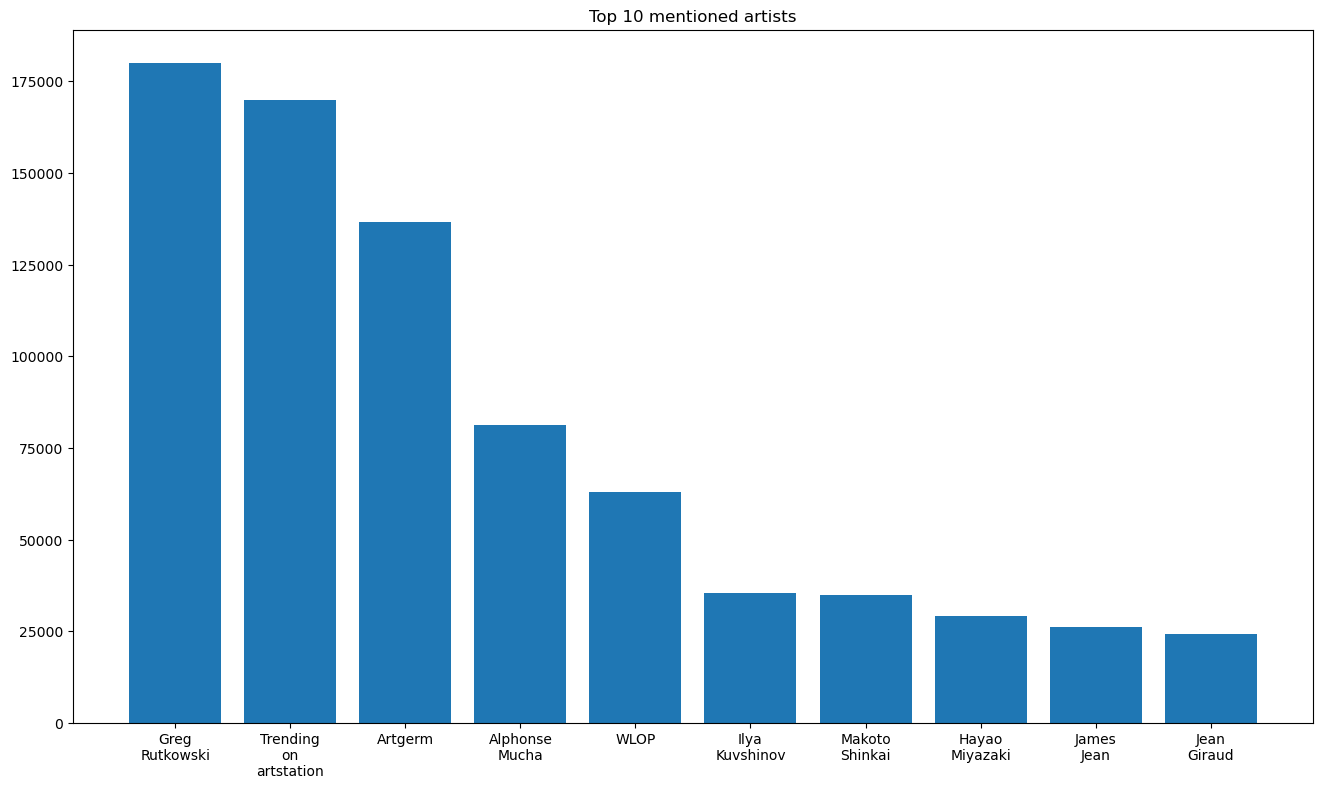

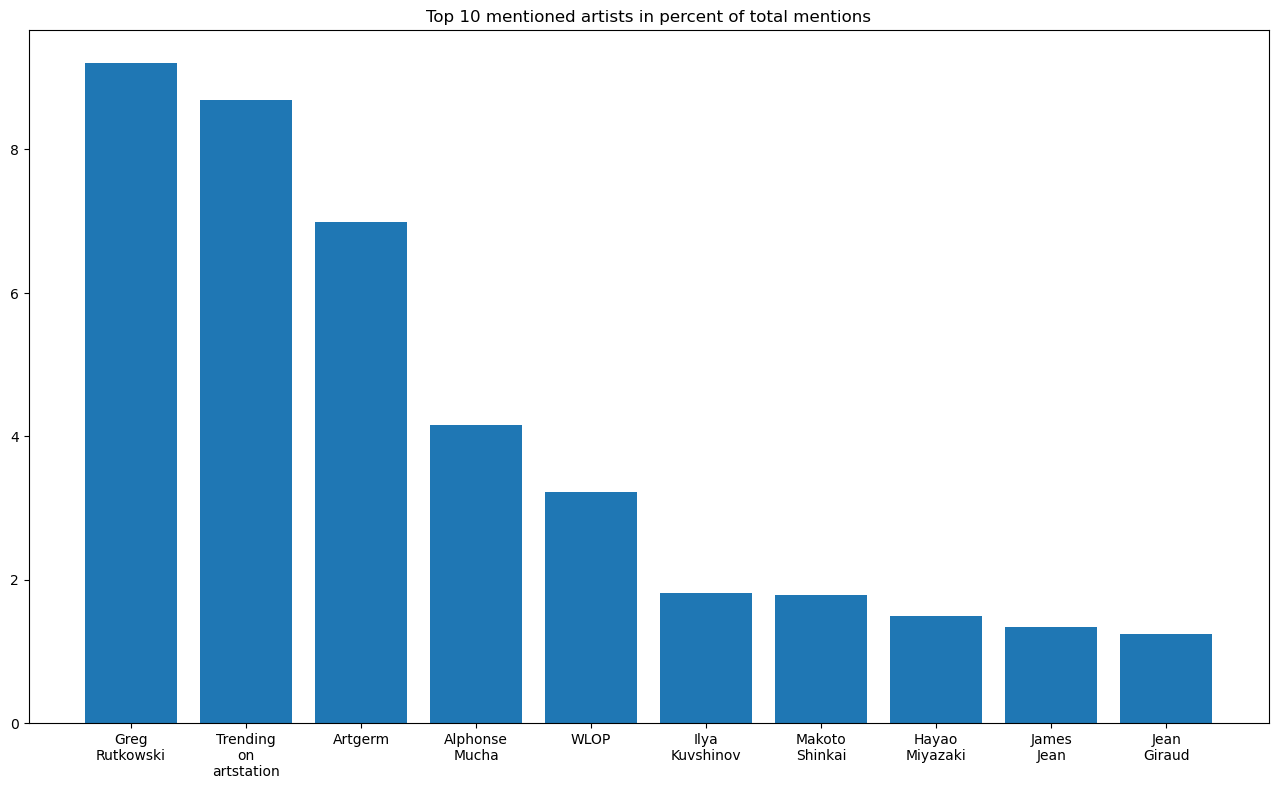

In [5]:
import matplotlib.pyplot as plt

top = 10

artist_mentions.sort_values("mentions", axis=0, ascending=False, inplace=True)


mentions_sum = artist_mentions["mentions"].sum(axis=0)
print(f'total mentions {mentions_sum}')
artist_mentions["percent"] = artist_mentions["mentions"] / mentions_sum * 100

print(f'top {top} artists')
print(artist_mentions.head(top))

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x.replace(" ", "\n") for x in artist_mentions["artist"].iloc[0:top]]
values = [x for x in artist_mentions["mentions"].iloc[0:top]]
ax.bar(names,values)
ax.set_title(f'Top {top} mentioned artists')
plt.show()


fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1, 1, 1) # fig.add_axes([0,0,1,1])
names = [x.replace(" ", "\n") for x in artist_mentions["artist"].iloc[0:top]]
values = [x for x in artist_mentions["percent"].iloc[0:top]]
ax.bar(names,values)
ax.set_title(f'Top {top} mentioned artists in percent of total mentions')
plt.savefig("../images/top10_artists.png")
plt.show()

mention description
count    1.819808e+06
mean     1.079544e+00
std      1.674443e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      8.100000e+01
Name: num_artists, dtype: float64
on average 1.0795441057518156 are mentioned per prompt
1964563 total mentions
993659 prompts had 0 artists found
351226 prompts had 1 artists found
175297 prompts had 2 artists found
135946 prompts had 3 artists found
74077 prompts had 4 artists found
39230 prompts had 5 artists found
25837 prompts had 6 artists found
10261 prompts had 7 artists found
5623 prompts had 8 artists found
2610 prompts had 9 artists found
2889 prompts had 10 artists found
1929 prompts had 11 artists found
473 prompts had 12 artists found
365 prompts had 13 artists found
162 prompts had 14 artists found
40 prompts had 15 artists found
28 prompts had 16 artists found
31 prompts had 17 artists found
18 prompts had 18 artists found
16 prompts had 19 artists found
57 prompts had 20 artis

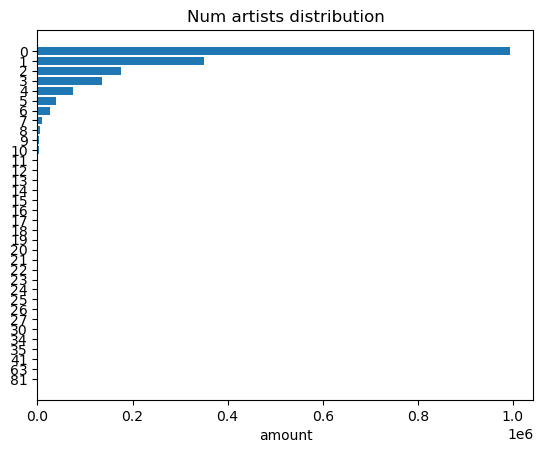

analysis of mention categories
993659 prompts had zero artists found
351226 prompts had one artist found
474923 prompts had two or more artists found


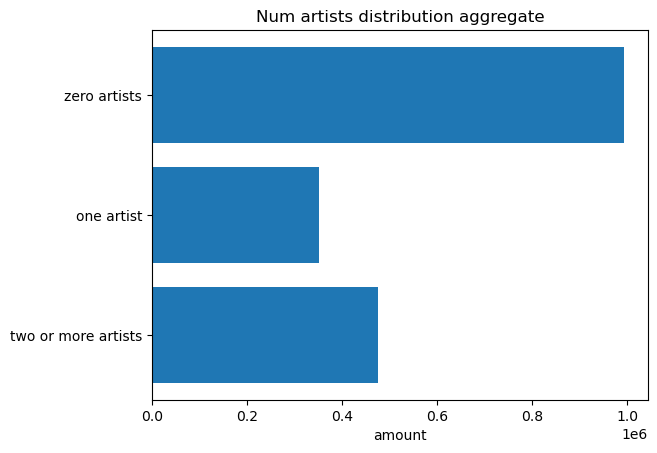

In [6]:

import matplotlib.pyplot as plt

mean_num_artists = exact_matches["num_artists"].mean(axis=0)
print("mention description")
print(exact_matches["num_artists"].describe())
print(f'on average {mean_num_artists} are mentioned per prompt')

print(f'{exact_matches["num_artists"].sum(axis=0)} total mentions')
  
# labels
labels  = exact_matches["num_artists"].unique()
labels.sort()
  
# values
values = [exact_matches[exact_matches["num_artists"]==x].shape[0] for x in labels]
  
for l, v in zip(labels, values):
    print(f'{v} prompts had {l} artists found')
    
    

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = range(len(labels))

ax.barh(y_pos, values, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('amount')
ax.set_title('Num artists distribution')

plt.show()

aggregate_labels = ["zero artists", "one artist", "two or more artists"]
aggregate_values = [exact_matches[exact_matches["num_artists"]==0].shape[0], exact_matches[exact_matches["num_artists"]==1].shape[0], exact_matches[exact_matches["num_artists"]>=2].shape[0]]

print(f'analysis of mention categories')
for l, v in zip(aggregate_labels, aggregate_values):
    print(f'{v} prompts had {l} found')

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = range(len(aggregate_labels))

ax.barh(y_pos, aggregate_values, align='center')
ax.set_yticks(y_pos, labels=aggregate_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('amount')
ax.set_title('Num artists distribution aggregate')

plt.show()